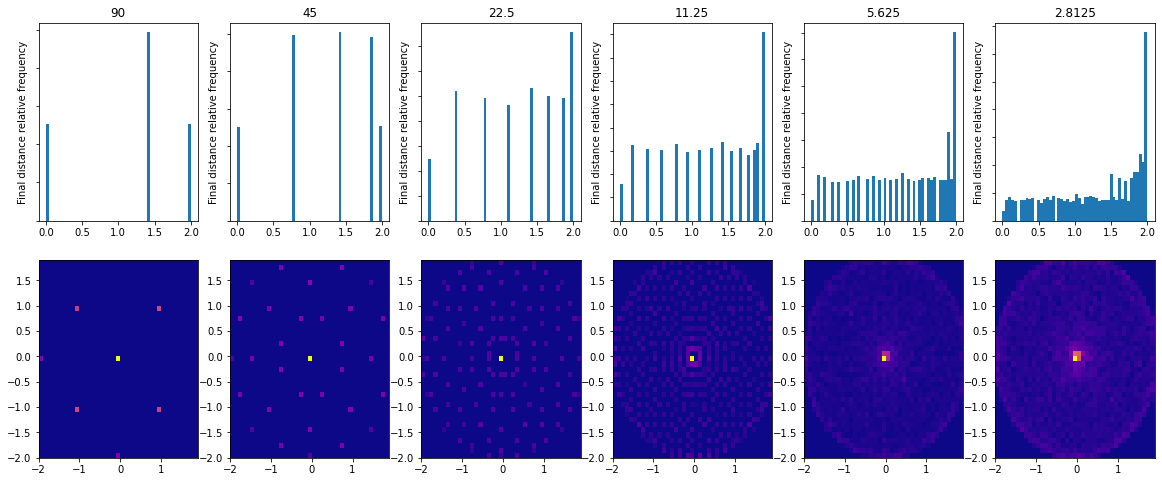

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib.cm import get_cmap
from random import randint

iterations = 10000
angle_deltas = [90, 45, 22.5, 11.25, 5.625, 2.8125]
chart_cols = len(angle_deltas)
chart_rows = 2

plt.figure(figsize=(20,8))
for plt_idx, angle_delta in enumerate(angle_deltas):
    xs = []
    ys = []

    # Have to use numpy.arange to support float increments
    angles = list(np.arange(0, 360, angle_delta))

    # Run Montecarlo simulation of final points
    for _ in range(iterations):
        random_indices = (randint(0, len(angles) - 1),
                          randint(0, len(angles) - 1))

        angle_1 = angles[random_indices[0]] * math.pi / 180
        angle_2 = angles[random_indices[1]] * math.pi / 180
        
        xs.append(math.cos(angle_1) + math.cos(angle_2))
        ys.append(math.sin(angle_1) + math.sin(angle_2))
    
    # Plot stuff
    horizontal_plt_idx = plt_idx + 1
    
    distances = [math.sqrt(x ** 2 + y ** 2) for (x,y) in zip(xs,ys)]
    distance_hist = plt.subplot(chart_rows, chart_cols, horizontal_plt_idx, title=f"{angle_delta}")
    distance_hist.set_yticklabels([])
    distance_hist.set_ylabel('Final distance relative frequency')
    distance_hist.hist(distances, bins=50, range=(0,2))

    bins_0_to_2 = np.arange(-2, 2, 0.1)
    points_plot = plt.subplot(chart_rows, chart_cols, horizontal_plt_idx + chart_cols)
    points_plot.hist2d(xs, ys, bins=[bins_0_to_2, bins_0_to_2], cmap=get_cmap('plasma'))

plt.show()